In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder

Exploratory Data Analysis and Data Wrangling

In [3]:
df =pd.read_csv('audi.csv')
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,30,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,30,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,20,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,20,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,30,55.4,1.4


In [4]:
df.shape

(10668, 9)

In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [6]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

<AxesSubplot:>

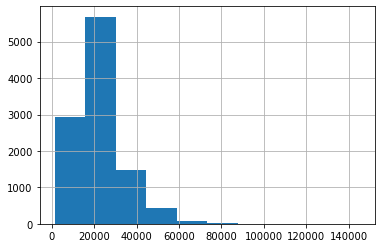

In [8]:
df['price'].hist()

Plot the Box plot to check for outliers in the price column

From the boxplot there are outliers so I will check for the possible cause of the outliers

In [9]:
px.box(df, y='price', width= 600, height=400)

The models Q7, Q8 and RS4 have really high prices, thus the Outliers.
Rather than delete the outliers, I considered the car model as predictor values for the my algorithm

In [10]:
df[df['price']>=60000].head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
198,Q7,2020,62985,Semi-Auto,10,Diesel,145,33.2,3.0
299,Q8,2018,63985,Semi-Auto,8450,Diesel,145,32.8,3.0
316,Q7,2020,82995,Semi-Auto,826,Diesel,145,29.4,4.0
632,RS4,2020,69995,Semi-Auto,2200,Petrol,145,28.8,2.9
640,Q7,2018,60995,Automatic,3893,Diesel,145,39.2,4.0


In [11]:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.592581,-0.789667,0.093066,-0.351281,-0.031582
price,0.592581,1.000000,-0.535357,0.356157,-0.600334,0.591262
mileage,-0.789667,-0.535357,1.000000,-0.166547,0.395103,0.070710
tax,0.093066,0.356157,-0.166547,1.000000,-0.635909,0.393075
mpg,-0.351281,-0.600334,0.395103,-0.635909,1.000000,-0.365621
engineSize,-0.031582,0.591262,0.070710,0.393075,-0.365621,1.000000


In [12]:
df['year'].unique()

array([2017, 2016, 2019, 2015, 2014, 2018, 2013, 2020, 2004, 2009, 2012,
       2010, 2007, 2011, 2008, 2003, 2005, 2002, 2006, 1998, 1997],
      dtype=int64)

In [13]:
df['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

The Transmission type and Gas type are possible predictor values, so I created dummy variables for them

In [14]:
transmission_dummy =pd.get_dummies(df['transmission'])
transmission_dummy.head()

,Automatic,Manual,Semi-Auto
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0


In [15]:
df = pd.concat([df, transmission_dummy], axis=1)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Automatic,Manual,Semi-Auto
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,0,1,0
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,1,0,0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,0,1,0
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,1,0,0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,0,1,0


In [16]:
fueltype_dummy = pd.get_dummies(df['fuelType'])
fueltype_dummy.head()

,Diesel,Hybrid,Petrol
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [17]:
df= pd.concat([df, fueltype_dummy], axis=1)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Automatic,Manual,Semi-Auto,Diesel,Hybrid,Petrol
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,0,1,0,0,0,1
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,1,0,0,1,0,0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,0,1,0,0,0,1
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,1,0,0,1,0,0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,0,1,0,0,0,1


In [18]:
df.corr()

,year,price,mileage,tax,mpg,engineSize,Automatic,Manual,Semi-Auto,Diesel,Hybrid,Petrol
year,1.000000,0.592581,-0.789667,0.093066,-0.351281,-0.031582,0.110245,-0.271576,0.181076,-0.122650,0.007761,0.121886
price,0.592581,1.000000,-0.535357,0.356157,-0.600334,0.591262,0.264294,-0.483137,0.259356,0.030452,0.031946,-0.033733
mileage,-0.789667,-0.535357,1.000000,-0.166547,0.395103,0.070710,-0.086044,0.218079,-0.147694,0.240183,0.008863,-0.241152
tax,0.093066,0.356157,-0.166547,1.000000,-0.635909,0.393075,0.203198,-0.358241,0.185654,-0.099025,-0.040733,0.103224
mpg,-0.351281,-0.600334,0.395103,-0.635909,1.000000,-0.365621,-0.205186,0.385169,-0.211845,0.280487,0.393983,-0.320926
engineSize,-0.031582,0.591262,0.070710,0.393075,-0.365621,1.000000,0.247971,-0.407741,0.195931,0.370917,-0.018414,-0.369124
Automatic,0.110245,0.264294,-0.086044,0.203198,-0.205186,0.247971,1.000000,-0.485761,-0.415481,0.107942,0.020596,-0.110079
Manual,-0.271576,-0.483137,0.218079,-0.358241,0.385169,-0.407741,-0.485761,1.000000,-0.593251,-0.062978,-0.042723,0.067371
Semi-Auto,0.181076,0.259356,-0.147694,0.185654,-0.211845,0.195931,-0.415481,-0.593251,1.000000,-0.033875,0.025491,0.031272
Diesel,-0.122650,0.030452,0.240183,-0.099025,0.280487,0.370917,0.107942,-0.062978,-0.033875,1.000000,-0.053692,-0.994752


In [19]:
df.rename(columns={'Automatic':'automatic_trans', 'Manual':'manual_trans', 'Semi-Auto':'semi_auto_trans'}, inplace=True)
df.rename(columns={'Diesel':'diesel_type', 'Hybrid':'hybrid_type', 'Petrol':'petrol_type'}, inplace=True)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,automatic_trans,manual_trans,semi_auto_trans,diesel_type,hybrid_type,petrol_type
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,0,1,0,0,0,1
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,1,0,0,1,0,0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,0,1,0,0,0,1
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,1,0,0,1,0,0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,0,1,0,0,0,1


In [20]:
df.drop(df.index[df['year']<2010], inplace=True) 
df['year'].unique()

array([2017, 2016, 2019, 2015, 2014, 2018, 2013, 2020, 2012, 2010, 2011],
      dtype=int64)

I am making my model based on cars made in 2010 and later, so I dropped the cars older than 2010

In [21]:
df= df.drop(df.index[df['mpg']>100])

Check for the correlation between the Features

In [22]:
df.corr()

,year,price,mileage,tax,mpg,engineSize,automatic_trans,manual_trans,semi_auto_trans,diesel_type,hybrid_type,petrol_type
year,1.000000,0.602626,-0.784726,0.218783,-0.490287,-0.001760,0.134052,-0.284352,0.172259,-0.145837,NaN,0.145837
price,0.602626,1.000000,-0.526498,0.400261,-0.703496,0.613229,0.269629,-0.482854,0.253952,0.032450,NaN,-0.032450
mileage,-0.784726,-0.526498,1.000000,-0.240806,0.484132,0.060268,-0.093688,0.214468,-0.136734,0.254496,NaN,-0.254496
tax,0.218783,0.400261,-0.240806,1.000000,-0.680016,0.382761,0.205337,-0.382226,0.208464,-0.097027,NaN,0.097027
mpg,-0.490287,-0.703496,0.484132,-0.680016,1.000000,-0.387706,-0.241558,0.457182,-0.253061,0.334307,NaN,-0.334307
engineSize,-0.001760,0.613229,0.060268,0.382761,-0.387706,1.000000,0.248020,-0.414201,0.202487,0.378778,NaN,-0.378778
automatic_trans,0.134052,0.269629,-0.093688,0.205337,-0.241558,0.248020,1.000000,-0.483269,-0.416180,0.112347,NaN,-0.112347
manual_trans,-0.284352,-0.482854,0.214468,-0.382226,0.457182,-0.414201,-0.483269,1.000000,-0.594924,-0.066311,NaN,0.066311
semi_auto_trans,0.172259,0.253952,-0.136734,0.208464,-0.253061,0.202487,-0.416180,-0.594924,1.000000,-0.034276,NaN,0.034276
diesel_type,-0.145837,0.032450,0.254496,-0.097027,0.334307,0.378778,0.112347,-0.066311,-0.034276,1.000000,NaN,-1.000000


<AxesSubplot:>

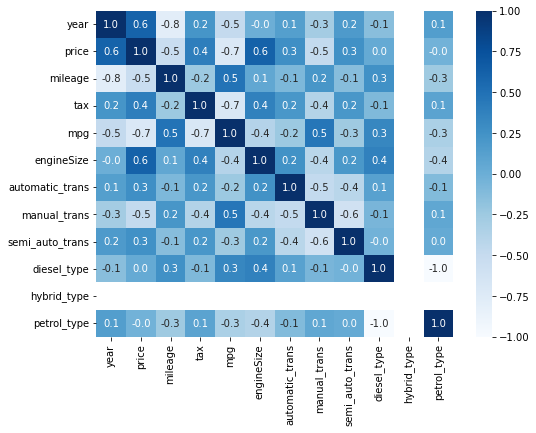

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap=('Blues'), annot=True, fmt='.1f')

The Year is positively correlated with the Price

Text(0.5, 1.0, 'The correlation between the Year and Price')

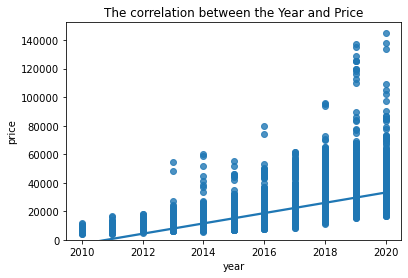

In [24]:
%matplotlib inline
sns.regplot(x='year', y='price', data=df)
plt.ylim(0,)
plt.title('The correlation between the Year and Price')

The Milleage is negatively correlated with the price

(0.0, 153122.6158476481)

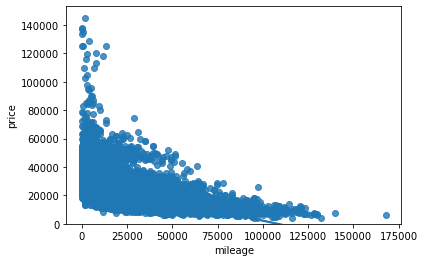

In [25]:
sns.regplot(x='mileage', y='price', data=df)
plt.ylim(0,)

The Engine Size is positively correlated with the price

(0.0, 152308.35392082942)

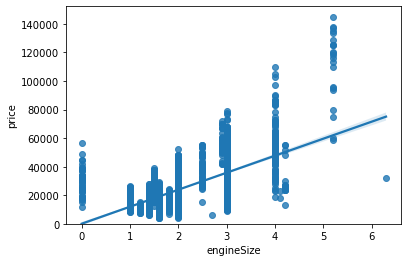

In [26]:
sns.regplot(x='engineSize', y='price', data=df)
plt.ylim(0,)

The MPG is negatively correlated with the price

(0.0, 152270.4895798433)

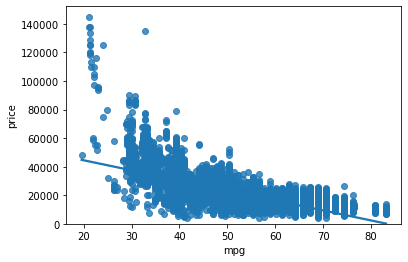

In [27]:
sns.regplot(x='mpg', y='price', data=df)
plt.ylim(0,)

In [28]:
from scipy import stats

In [29]:
pearson_coef, p_value= stats.pearsonr(df['mileage'], df['price'])
print("the pearson correlation and p_value for mileage is", pearson_coef,", ", p_value)

the pearson correlation and p_value for mileage is -0.5264979741959488 ,  0.0


In [31]:
pearson_coef, p_value= stats.pearsonr(df['year'], df['price'])
print("the pearson correlation and p_value for age is", pearson_coef,", ", p_value)

the pearson correlation and p_value for age is 0.6026263027003363 ,  0.0


In [32]:
pearson_coef, p_value= stats.pearsonr(df['mpg'], df['price'])
print("the pearson correlation and p_value for mpg is", pearson_coef,", ", p_value)

the pearson correlation and p_value for mpg is -0.7034960021377756 ,  0.0


In [33]:
pearson_coef, p_value= stats.pearsonr(df['engineSize'], df['price'])
print("the pearson correlation and p_value for engine size is", pearson_coef,", ", p_value)

the pearson correlation and p_value for engine size is 0.6132293314754687 ,  0.0


In [34]:
pearson_coef, p_value= stats.pearsonr(df['manual_trans'], df['price'])
print("the pearson correlation and p_value for manual transmission is", pearson_coef,", ", p_value)

the pearson correlation and p_value for manual transmission is -0.4828540809766646 ,  0.0


In [35]:
pearson_coef, p_value= stats.pearsonr(df['tax'], df['price'])
print("the pearson correlation and p_value for tax is", pearson_coef,", ", p_value)

the pearson correlation and p_value for tax is 0.4002606565810189 ,  0.0


In [37]:
pearson_coef, p_value= stats.pearsonr(df['semi_auto_trans'], df['price'])
print("the pearson correlation and p_value for semi auto transmission is", pearson_coef,", ", p_value)

the pearson correlation and p_value for semi auto transmission is 0.2539523221178139 ,  7.534543738554062e-155


In [38]:
pearson_coef, p_value= stats.pearsonr(df['automatic_trans'], df['price'])
print("the pearson correlation and p_value for automatic transmission is", pearson_coef,", ", p_value)

the pearson correlation and p_value for automatic transmission is 0.2696286269844598 ,  4.7661082182179874e-175


In [39]:
df['model']= df['model'].str.strip()

In [40]:
df_model = df[['model', 'price']]
df_groupby = df_model.groupby('model', as_index= False).mean()
df_groupby = df_groupby.sort_values(['price'],ascending = False)
df_groupby['model'].tolist()

['R8',
 'Q8',
 'RS6',
 'RS5',
 'RS4',
 'SQ7',
 'Q7',
 'S4',
 'A8',
 'RS3',
 'S8',
 'RS7',
 'SQ5',
 'Q5',
 'A7',
 'A5',
 'Q3',
 'A6',
 'Q2',
 'TT',
 'S3',
 'A4',
 'A3',
 'S5',
 'A1']

Convert the model column variables from categorical to numerical using the sklearn LabelEncoder

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le_model = LabelEncoder().fit(['R8',
                               'Q8',
                               'RS6',
                               'RS5',
                               'RS4',
                               'SQ7',
                               'Q7',
                               'S4',
                               'A8',
                               'RS3',
                               'S8',
                               'RS7',
                               'SQ5',
                               'Q5',
                               'A7',
                               'A5',
                               'Q3',
                               'A6',
                               'Q2',
                               'TT',
                               'S3',
                               'A4',
                               'A3',
                               'S5',
                               'A1'])
df['model'] = le_model.transform(df['model'])


In [43]:
df.corr()

,model,year,price,mileage,tax,mpg,engineSize,automatic_trans,manual_trans,semi_auto_trans,diesel_type,hybrid_type,petrol_type
model,1.000000,0.078991,0.397868,-0.080354,0.385505,-0.447675,0.356139,0.107588,-0.183800,0.092121,0.039185,NaN,-0.039185
year,0.078991,1.000000,0.602626,-0.784726,0.218783,-0.490287,-0.001760,0.134052,-0.284352,0.172259,-0.145837,NaN,0.145837
price,0.397868,0.602626,1.000000,-0.526498,0.400261,-0.703496,0.613229,0.269629,-0.482854,0.253952,0.032450,NaN,-0.032450
mileage,-0.080354,-0.784726,-0.526498,1.000000,-0.240806,0.484132,0.060268,-0.093688,0.214468,-0.136734,0.254496,NaN,-0.254496
tax,0.385505,0.218783,0.400261,-0.240806,1.000000,-0.680016,0.382761,0.205337,-0.382226,0.208464,-0.097027,NaN,0.097027
mpg,-0.447675,-0.490287,-0.703496,0.484132,-0.680016,1.000000,-0.387706,-0.241558,0.457182,-0.253061,0.334307,NaN,-0.334307
engineSize,0.356139,-0.001760,0.613229,0.060268,0.382761,-0.387706,1.000000,0.248020,-0.414201,0.202487,0.378778,NaN,-0.378778
automatic_trans,0.107588,0.134052,0.269629,-0.093688,0.205337,-0.241558,0.248020,1.000000,-0.483269,-0.416180,0.112347,NaN,-0.112347
manual_trans,-0.183800,-0.284352,-0.482854,0.214468,-0.382226,0.457182,-0.414201,-0.483269,1.000000,-0.594924,-0.066311,NaN,0.066311
semi_auto_trans,0.092121,0.172259,0.253952,-0.136734,0.208464,-0.253061,0.202487,-0.416180,-0.594924,1.000000,-0.034276,NaN,0.034276


In [44]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,automatic_trans,manual_trans,semi_auto_trans,diesel_type,hybrid_type,petrol_type
0,0,2017,12500,Manual,15735,Petrol,150,55.4,1.4,0,1,0,0,0,1
1,4,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,1,0,0,1,0,0
2,0,2016,11000,Manual,29946,Petrol,30,55.4,1.4,0,1,0,0,0,1
3,2,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,1,0,0,1,0,0
4,1,2019,17300,Manual,1998,Petrol,145,49.6,1.0,0,1,0,0,0,1


set X as the independent variable and y as the dependent variable and then standardize the X features

In [45]:
X =df[['year', 'mpg', 'mileage', 'engineSize', 'manual_trans', 'semi_auto_trans', 'automatic_trans', 'tax', 'model']]
y= df['price']

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
import math

In [47]:
scaler= StandardScaler()
X = scaler.fit_transform(X)

I use the multiple linear regression

In [48]:
lm = LinearRegression()
lm

LinearRegression()

The Linear Regression achieves an R2 score of 0.77, with an RMSE OF 5365. This is not bad, but it can be better

In [49]:
cvs = cross_val_score(lm, X, y,  cv=5)
print('The R2 scores for the Multiple Linear Regression are: ', cvs)
print('The average R2 score is: ', cvs.mean())
print('')
cvs1= cross_val_score(lm, X, y, scoring='neg_mean_squared_error', cv=5 )
print('The MSE scores for the Multiple Linear Regression are: ', np.sqrt(abs(cvs1)))
print('The average MSE score is: ', np.sqrt(abs(cvs1)).mean())


The R2 scores for the Multiple Linear Regression are:  [0.82572821 0.80872307 0.77955192 0.7527692  0.8396755 ]
The average R2 score is:  0.8012895795369381

The MSE scores for the Multiple Linear Regression are:  [4209.0722554  5067.70107479 5901.81850522 5465.13979217 4504.61480965]
The average MSE score is:  5029.669287447692


In [50]:
cvp = cross_val_predict(lm, X, y,  cv=5 )
cvp[0:5]

array([13883.45574985, 19833.45574985, 14757.45574985, 16985.45574985,
       17283.45574985])

From the plot it is seen that the Linear Model model does not fully capture all the points

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



Text(0.5, 1.0, 'The Actual values vs the Predicted Values')

<Figure size 864x576 with 0 Axes>

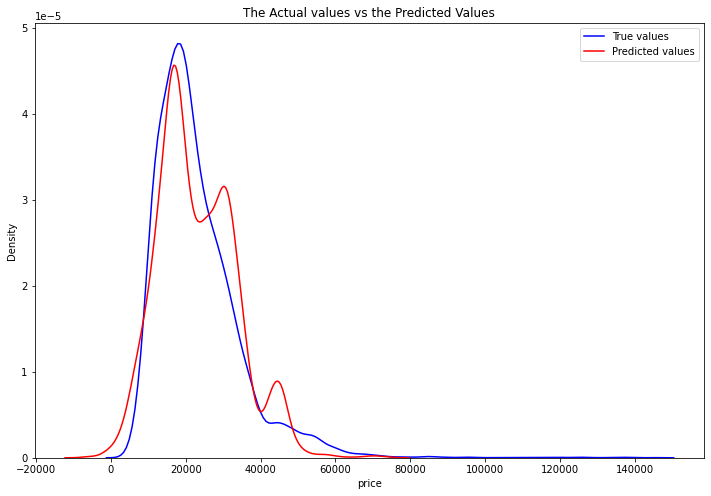

In [61]:
plt.figure(figsize=(12,8))
plt.figure(figsize=(12,8))
ax1=sns.distplot(y, color='b', hist=False, label = 'True values')
sns.distplot(cvp, color='r', hist= False, label= 'Predicted values', ax=ax1)
plt.legend()
plt.title('The Actual values vs the Predicted Values')


I tried the Ridge Regresson but there is clearly no improvement to the Linear Regression

In [52]:
rig = Ridge()
rig_cv = cross_val_score(rig, X, y,  cv=5 )
print('The R2 scores for the Ridge Regression are: ', rig_cv)
print('The average R2 score is: ', rig_cv.mean())
print('')
rig_cv1= cross_val_score(rig, X, y, scoring='neg_mean_squared_error', cv=5 )
print('The MSE scores for the Ridge Regression are: ', np.sqrt(abs(rig_cv1)))
print('The average MSE score is: ', np.sqrt(abs(rig_cv1)).mean())



The R2 scores for the Ridge Regression are:  [0.8257874  0.80871861 0.77950207 0.75280581 0.83968414]
The average R2 score is:  0.8012996068618993

The MSE scores for the Ridge Regression are:  [4208.35736311 5067.7601209  5902.48569255 5464.73511554 4504.49352017]
The average MSE score is:  5029.566362455527


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



Text(0.5, 1.0, 'The Actual values vs the Predicted Values')

<Figure size 864x576 with 0 Axes>

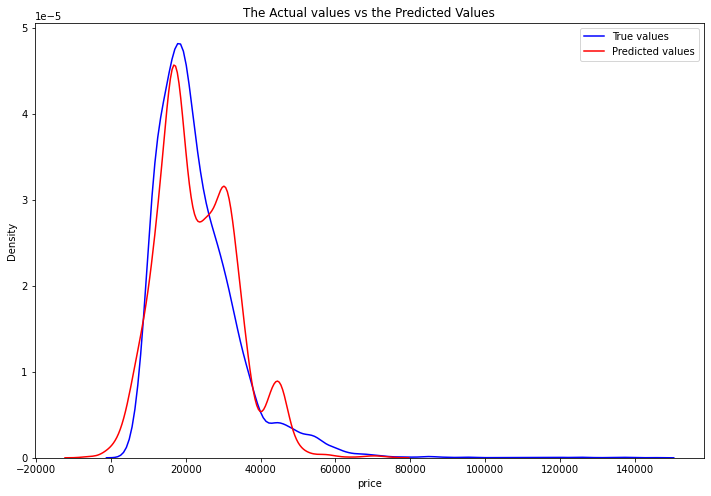

In [60]:
rig_pred = cross_val_predict(rig, X,y, cv=5)
rig_pred[0:5]

plt.figure(figsize=(12,8))
plt.figure(figsize=(12,8))
ax1=sns.distplot(y, color='b', hist=False, label = 'True values')
sns.distplot(rig_pred, color='r', hist= False, label= 'Predicted values', ax=ax1)
plt.legend()
plt.title('The Actual values vs the Predicted Values')

I tried the Lasso Regresson but again, there is clearly no improvement to the Linear Regression


In [54]:
las = Lasso()
las_cv = cross_val_score(las, X, y,  cv=5 )
print('The R2 scores for the Lasso Regression are: ', las_cv)
print('The average R2 score is: ', las_cv.mean())
print('')
las_cv1= cross_val_score(las, X, y, scoring='neg_mean_squared_error', cv=5 )
print('The MSE scores for the Lasso Regression are: ', np.sqrt(abs(las_cv1)))
print('The average MSE score is: ', np.sqrt(abs(las_cv1)).mean())



The R2 scores for the Lasso Regression are:  [0.82580064 0.80871123 0.77947117 0.75279783 0.83971011]
The average R2 score is:  0.8012981946419087

The MSE scores for the Lasso Regression are:  [4208.1974924  5067.85792335 5902.89925318 5464.82337252 4504.12865424]
The average MSE score is:  5029.581339138111


I tried the Polynomial Regression which led to a 15% increase in accuracy over the Linear Regression with an R2 score of 0.92 and RMSE OF 3124.
The Polynomial Regression Model is the best model for this data

In [55]:

input= [('polynomial', PolynomialFeatures(degree=3)), ('model', LinearRegression())]
pipe = Pipeline(input)
poly_cv = cross_val_score(pipe, X, y,  cv=5 )
print('The R2 scores for the Polynomial Regression are: ', poly_cv)
print('The average R2 score is: ', poly_cv.mean())
print('')
poly_cv1= cross_val_score(pipe, X, y, scoring='neg_mean_squared_error', cv=5 )
print('The MSE scores for the Polynomial Regression are: ', np.sqrt(abs(poly_cv1)))
print('The average MSE score is: ', np.sqrt(abs(poly_cv1)).mean())



The R2 scores for the Polynomial Regression are:  [0.9179515  0.94344431 0.92125448 0.92377948 0.92559781]
The average R2 score is:  0.926405515456528

The MSE scores for the Polynomial Regression are:  [2888.07298048 2755.61046473 3527.32615959 3034.49160662 3068.67282601]
The average MSE score is:  3054.8348074868036


In [56]:
poly_cv1 = cross_val_score(pipe, X, y, scoring= 'neg_mean_squared_error', cv=5 )
print(abs(poly_cv1)**0.5)
print(poly_cv1.mean())

[2888.07298048 2755.61046473 3527.32615959 3034.49160662 3068.67282601]
-9400255.326759867


In [57]:
pipe_pred = cross_val_predict(pipe, X,y, cv=5)
pipe_pred[0:5]

array([15629.984375 , 17661.1953125, 13261.0390625, 18743.6484375,
       19124.4296875])

From the Distribution Plot, it is seen that the Polynomial Regression almost fully captures all the points

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



Text(0.5, 1.0, 'The Actual values vs the Predicted Values')

<Figure size 864x576 with 0 Axes>

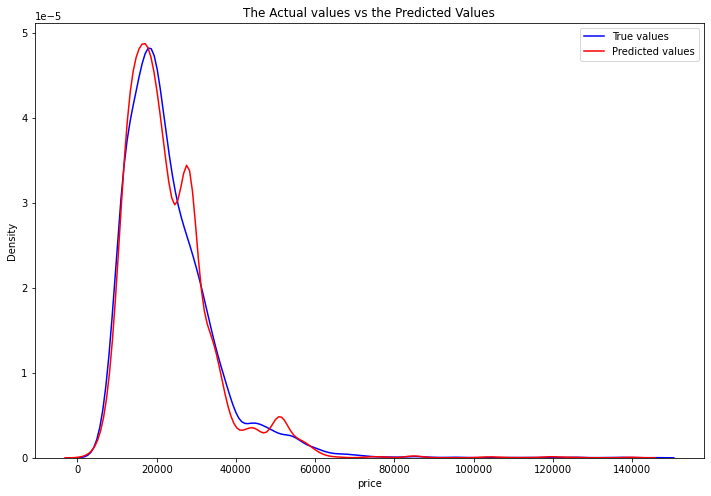

In [59]:
plt.figure(figsize=(12,8))
plt.figure(figsize=(12,8))
ax1=sns.distplot(y, color='b', hist=False, label = 'True values')
sns.distplot(pipe_pred, color='r', hist= False, label= 'Predicted values', ax=ax1)
plt.legend()
plt.title('The Actual values vs the Predicted Values')